# Finding Structure in Data

General advice:
- don't use Ctrl-C Ctrl-V, rewrite everything
- don't copy solutions from last year
- when you take inspirations from the labs from last year, change the scatterplot color
- use auto-completion and shortcuts
- use coherent syntax: pep8 

In [56]:
# test of autocompletion, help ...

## I - Introduction: Unsupervised Learning

Unsupervised learning helps finding structure in data without the use of labels.

A label is semantic knowledge attached to a datapoint by a human:
- a class (Dog, Cat) : classification
- a target number (financial gain, completion of a task) : regression
- a reward : reinforcement learning

We will see how labels can be used to predict and solve tasks in Lecture 8.

For now, we focus on Unsupervised Learning: exploring data and finding structure with Machine Learning.

aka: Introduction to (Introduction to (Introduction to Unsupervised Learning))


<center>
<img src="imgs/unsupervised_learning.png" alt="Unsupervised Learning Sketch" style="width: 800px;"/>
</center>
    
Different ways to extract information from the data:
- dimensionality reduction
- clustering: check at similarity between datapoints, group similar datapoints
- neural networks: learn compression of the data
- latent variable models: find the distribution that generated the data


## Today, we will focus on Clustering.

From Wikipedia: _Cluster analysis or clustering is the task of grouping a set of objects in such a way that objects in the same group (called a cluster) are more similar (in some sense) to each other than to those in other groups (clusters). It is a main task of exploratory data mining, and a common technique for statistical data analysis, used in many fields, including machine learning, pattern recognition, image analysis, information retrieval, bioinformatics, data compression, and computer graphics._

Tl, dr :
- group by similarity
- exploration of data
- ubiquitous in DataScience


Many forms, we will give the motivation and examples for three important algorithms:
- K-means clustering
- Gaussian Mixture models
- Spectral Clustering

<img src="imgs/cluster_comparison.png" alt="Unsupervised Learning Sketch" style="width: 600px;"/>

## Some questions related to clustering

What is a good measure of similarity? 

How do you want to group similar datapoints together?

What attributes / features are important for my clustering?

How many clusters do I want?

Hard or soft clustering?

How do we evaluate clustering?


### Why is clustering important?
- it provides insights about the dataset
- it allows to build prototypes, representation of classical samples from your database
- it can be used to perform vector quantization
- it can help when dataset is unbalanced: sampling, marketing research
- it can be used for feature learning



## II - K-Means clusetring

K-means: 
- Segment space into clusters
- Hard clustering: each point belongs to a cluster

Goal: 
- Assign datapoints to representative clusters.
- Each point is associated with a cluster center

K-means minimize the within-cluster variances.

## Standard algorithm

Problem is NP-hard, but iterative approaches are efficient.

Refine clustering little by little, converge to a local optimum.

Given data samples:
$(x_1, x_2, ... x_n)$

Try to find the best k centers with k<m:
$(m_1, m_2, ... m_k)$

Two-step process:
- Assignment step: Assign each $x_i$ to the closest centroid
- Update step: Re-calculate the means $m_j$

<img src="imgs/K-means_convergence.gif" width = "400" />

The algorithm:
- converges when the assignement doesn't change too much anymore
- local optimum, no guarantee for global optimum
- creates voronoi diagram

<img src="imgs/voronoi.png" alt="Voronoi Diagram" style="width: 400px;"/>

Initialization of centroids?
- random values within the dataset
- k-means ++: clever picking of the values
- multiple seeds, pick the best

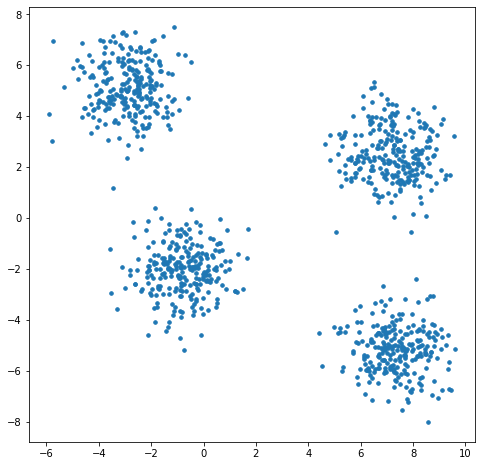

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_blobs

X, y_true = make_blobs(n_samples=1000, centers=4)

plt.figure(figsize = (8,8))
plt.scatter(X[:, 0], X[:, 1], s=50, marker = '.')
plt.show()

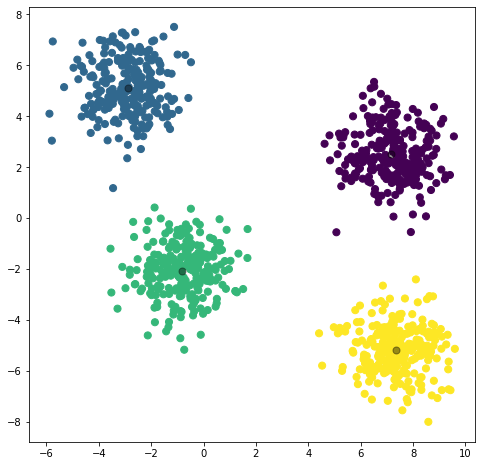

In [3]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4)
y_kmeans = kmeans.fit_predict(X)

plt.figure(figsize = (8,8))
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.4, marker = '.')

We need to know the number of clusters beforehand.

We often don't know the number of clusters in advance. 

It is easy to guess in 2D, but what about N-D?


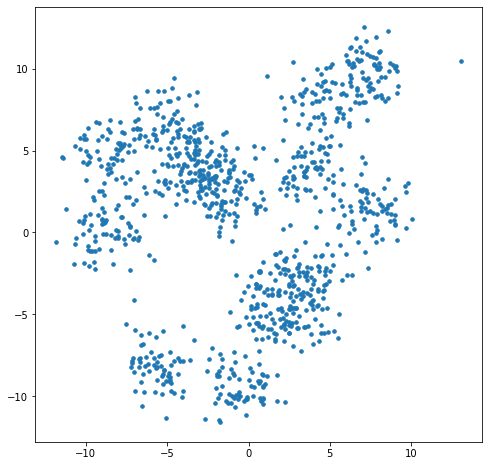

In [4]:
X, y_true = make_blobs(n_samples=1000, n_features=5, centers=15, cluster_std=1.2)
#plt.scatter(X[:, 2], X[:, 1], c = y_true, s=50)
plt.figure(figsize = (8,8))
plt.scatter(X[:, 0], X[:, 1], s=50, marker = '.')
plt.show()


### Elbow method

Try to find correct number of clusters visually.

Look at inertia: sum of squared distances of samples to their closest cluster center.

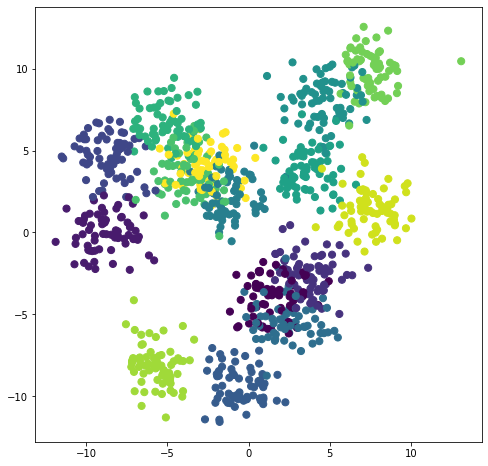

In [5]:
plt.figure(figsize = (8,8))
plt.scatter(X[:, 0], X[:, 1], c = y_true, s=50)


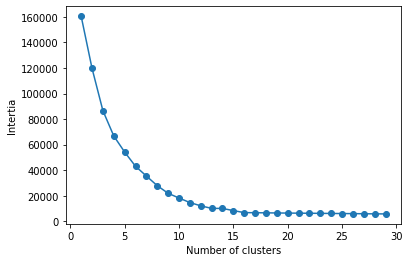

In [6]:
inertias = []
for i in range(1, 30):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(X)
    inertias.append(km.inertia_)

# plot
plt.plot(range(1, 30), inertias, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Intertia')
plt.show()

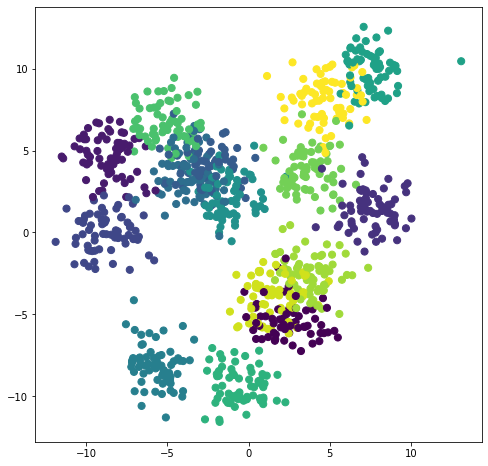

In [7]:
# Color with predicted cluster

km = KMeans(n_clusters=15)

y_kmeans = km.fit_predict(X)

plt.figure(figsize = (8,8))
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')


### Silouhette score

Silhouette value measures cluster consistency of a data point.

First, we measure the intra-cluster mean similarity:\
$a(i) = $  mean distance between a data point and all the other data points in its cluster

Then, measure the mean similarity with other clusters:\
$b_j(i) = $  mean distance between a data point and all the other data points in cluster $j$.

The cluster with the smallest mean similarity is the "neighboring cluster" $b(i)$.

Silouhette is now : 
\begin{equation}
s(i) = \frac{b(i) - a(i)}{max( a(i), b(i) )} 
\end{equation}

Mean silouhette over all data points tells us if the clustering is successful, and the number of clusters is appropriate.

For n_clusters = 5 The average silhouette_score is : 0.43701135292173604
For n_clusters = 7 The average silhouette_score is : 0.5007138508326001
For n_clusters = 9 The average silhouette_score is : 0.5580418421953441
For n_clusters = 11 The average silhouette_score is : 0.5793635794127678
For n_clusters = 13 The average silhouette_score is : 0.5864590993751392
For n_clusters = 15 The average silhouette_score is : 0.6153561918187672
For n_clusters = 17 The average silhouette_score is : 0.5562789407703228
For n_clusters = 19 The average silhouette_score is : 0.4964572461230226


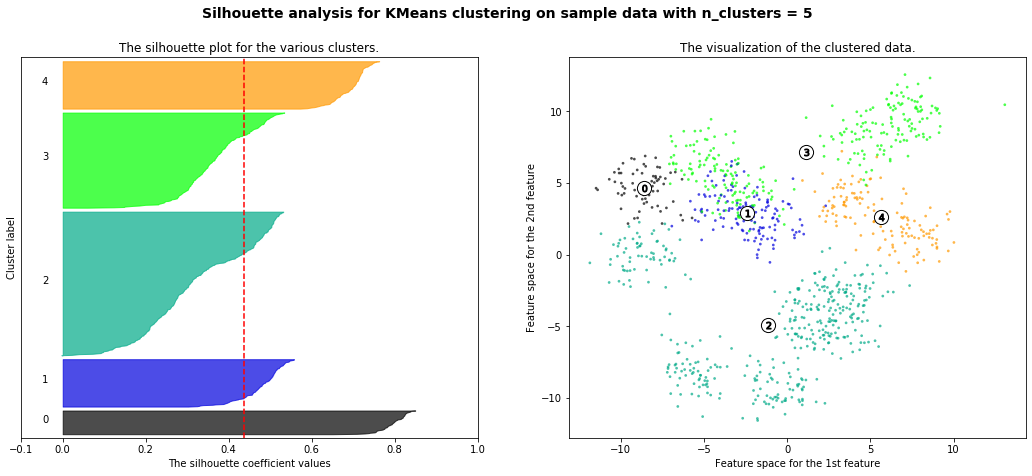

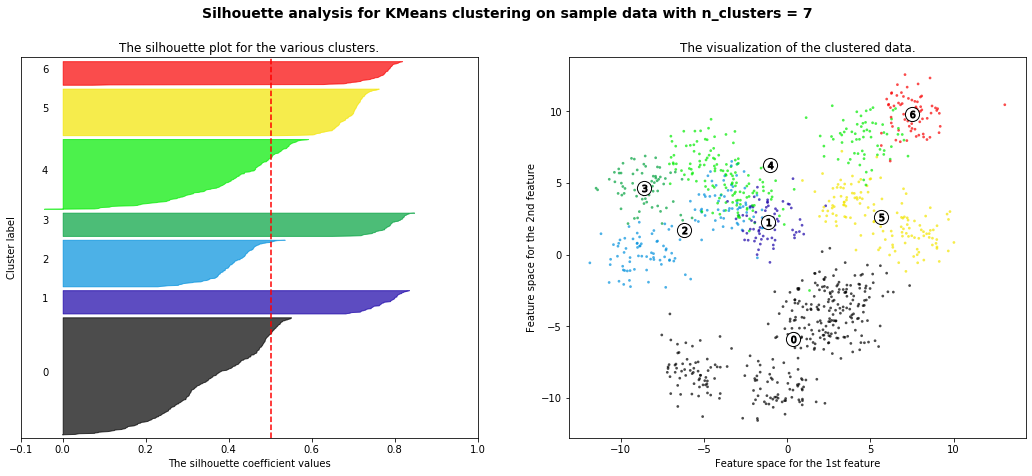

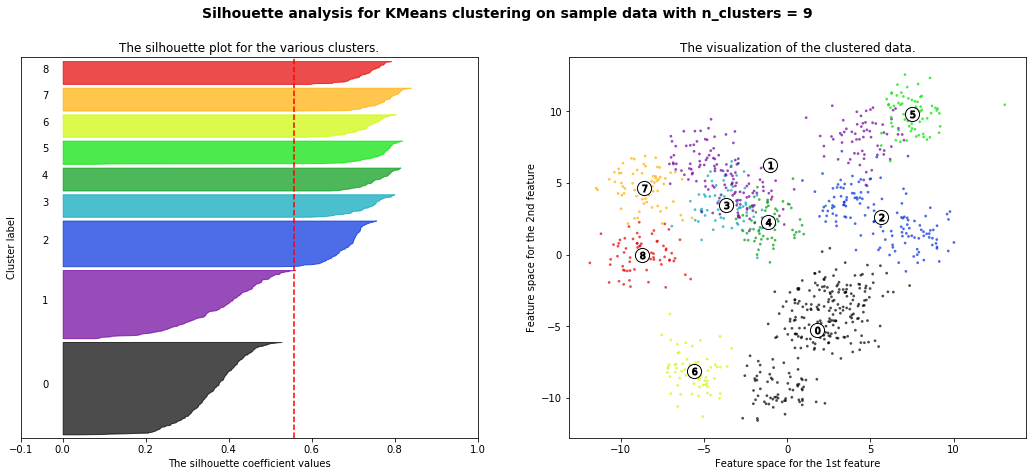

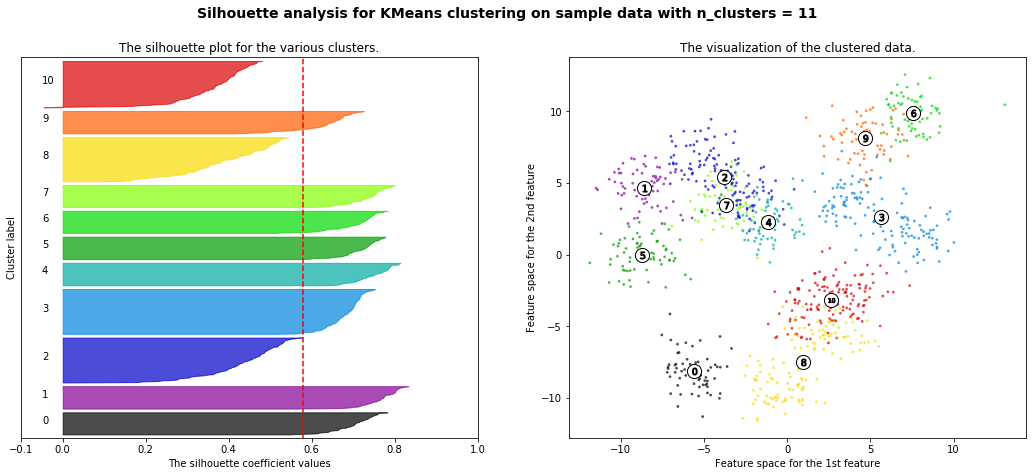

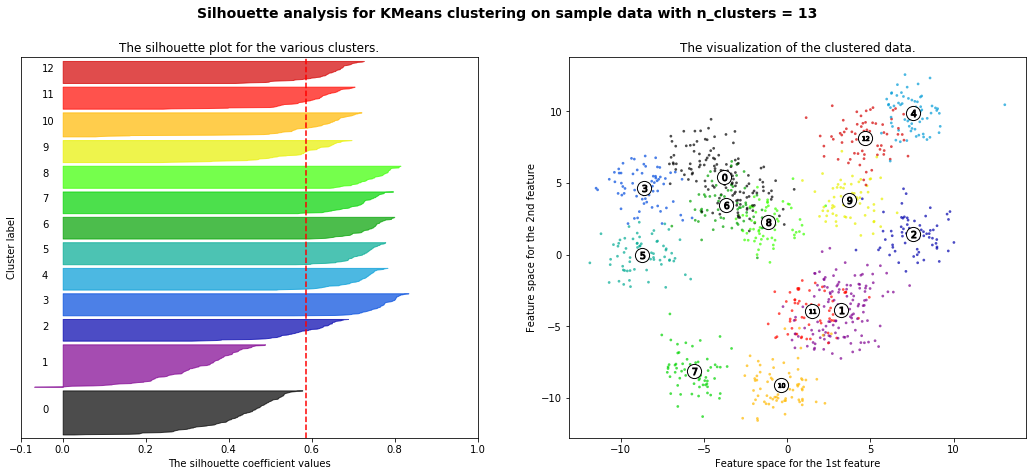

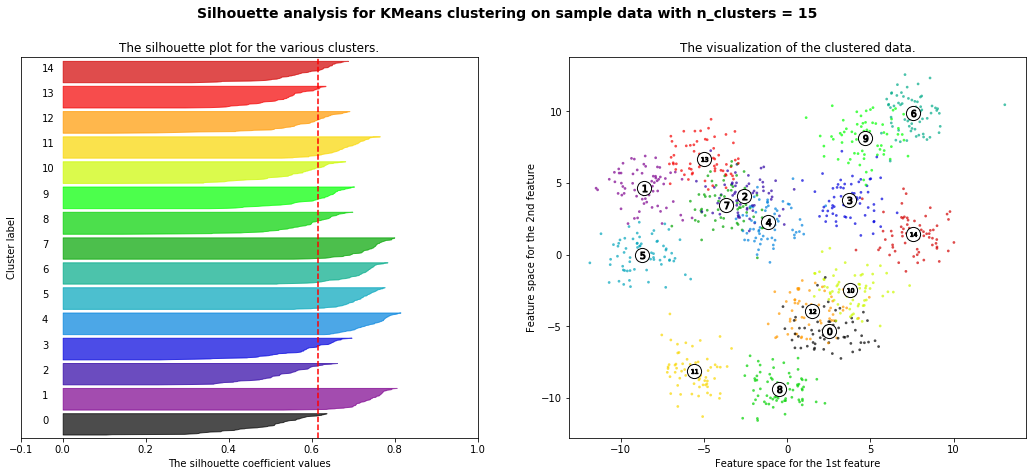

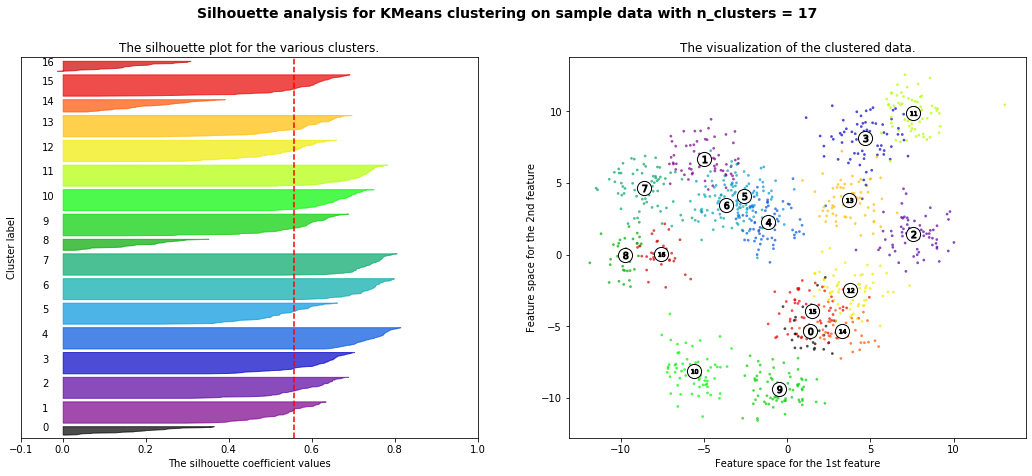

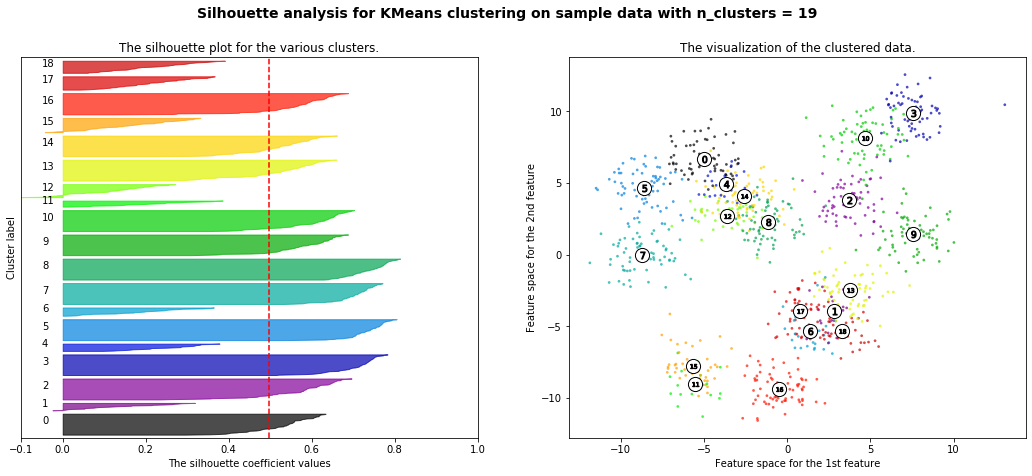

In [8]:
# Example from the scikit learn website

from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import numpy as np


range_n_clusters = range(5,20,2)

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

### Limitations of K-means

A lot of assumptions on:
- the shape of data
- the distance measure

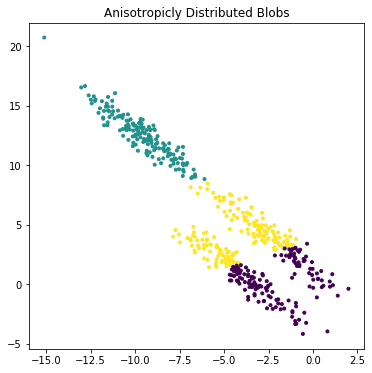

In [9]:
# Non spherical data

X, y_true = make_blobs(n_samples=500, centers=3,cluster_std=2)
transformation = [[0.8, -0.8], [-0.3, 0.7]]
X_aniso = np.dot(X, transformation)
y_pred = KMeans(n_clusters=3).fit_predict(X_aniso)

plt.figure(figsize=(6,6))
plt.scatter(X_aniso[:, 0], X_aniso[:, 1], c=y_pred, marker='.')
plt.title("Anisotropicly Distributed Blobs")
plt.show()

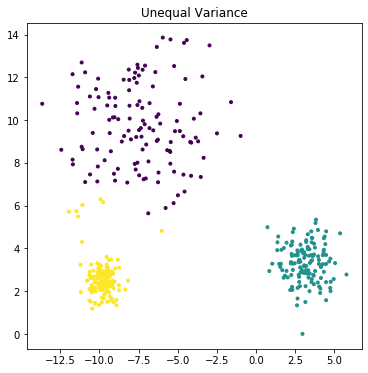

In [13]:
# Different variance
X_varied, y_varied = make_blobs(n_samples=400,
                                cluster_std=[1.0, 2.5, 0.5],
                                )
y_pred = KMeans(n_clusters=3).fit_predict(X_varied)

plt.figure(figsize=(6,6))
plt.scatter(X_varied[:, 0], X_varied[:, 1], c=y_pred, marker = '.')
plt.title("Unequal Variance")
plt.show()

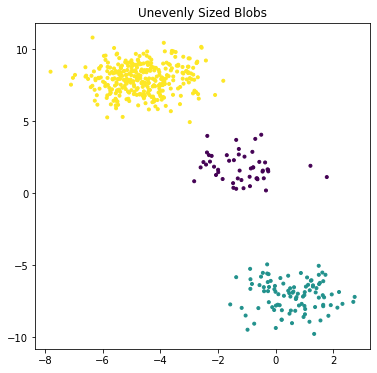

In [18]:
# Unevenly sized blobs
X, y_true = make_blobs(n_samples=1000, centers = 3)

X_filtered = np.vstack((X[y_true == 0][:500], X[y_true == 1][:50], X[y_true == 2][:100], X[y_true == 3][:10]))
y_pred = KMeans(n_clusters=3).fit_predict(X_filtered)

plt.figure(figsize=(6,6))

plt.scatter(X_filtered[:, 0], X_filtered[:, 1], c=y_pred, marker = '.')
plt.title("Unevenly Sized Blobs")

plt.show()

Advantage: K-means is good for spherical clusters (euclidian distance)

But, what if cluster is non-spherical?

What if we want soft clustering?

If we assume that the data is generated by distributions with different densities, the cut is less clear

In [19]:
# Example with Mobile games

import pandas as pd

wine_pd = pd.read_csv('data/winequality-red.csv')

wine_pd.head(4)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6


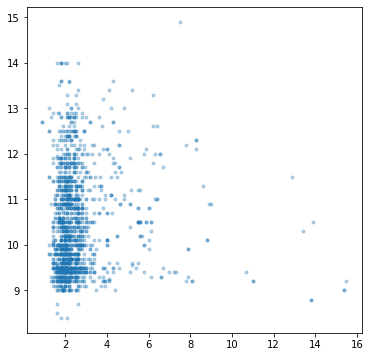

In [20]:
wine_np = wine_pd.to_numpy()

plt.figure(figsize=(6,6))
plt.scatter(wine_np[:, 3], wine_np[:,10], marker = '.', alpha = 0.3)
plt.show()


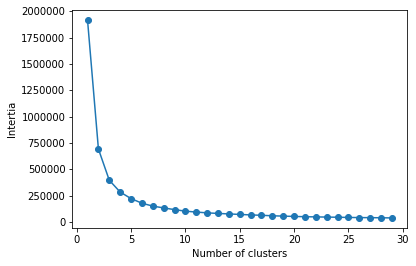

In [21]:
inertias = []
for i in range(1, 30): 
    km = KMeans( n_clusters=i )
    km.fit(wine_np[:, :11])
    inertias.append(km.inertia_)

# plot
plt.plot(range(1, 30), inertias, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Intertia')
plt.show()

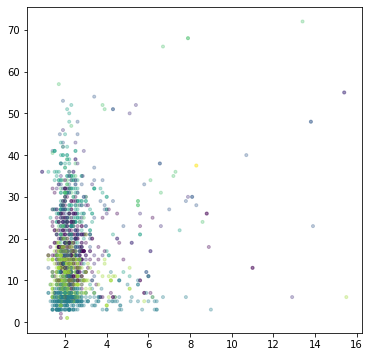

In [22]:
km = KMeans( n_clusters=8 )
y_pred = km.fit_predict(wine_np[:, :11])

plt.figure(figsize=(6,6))
plt.scatter(wine_np[:, 3], wine_np[:,5], c = y_pred, marker = '.', alpha = 0.3)
plt.show()

In [24]:
np.set_printoptions(precision=1, suppress=True)

print(km.cluster_centers_)

[[  8.3   0.5   0.3   2.5   0.1  17.   42.8   1.    3.3   0.7  10.5]
 [  7.9   0.5   0.3   3.1   0.1  24.2 107.1   1.    3.3   0.6  10. ]
 [  7.9   0.6   0.3   3.    0.1  23.2  83.8   1.    3.3   0.6  10.1]
 [  8.7   0.5   0.3   2.5   0.1   5.8  14.6   1.    3.3   0.6  10.7]
 [  8.1   0.5   0.3   2.3   0.1  25.1  60.7   1.    3.3   0.7  10.3]
 [  8.    0.6   0.3   3.4   0.1  33.7 137.8   1.    3.2   0.7   9.8]
 [  8.4   0.5   0.2   2.3   0.1  11.1  27.3   1.    3.3   0.7  10.4]
 [  7.9   0.3   0.7   8.3   0.1  37.5 283.5   1.    3.    0.5  12.3]]


## What did I do wrong?

<div class="alert alert-block alert-danger">
I forgot to normalize the data!
</div>

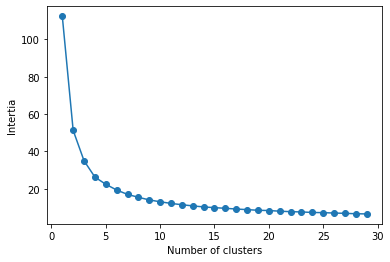

In [25]:
from sklearn.preprocessing import normalize
wine_np = wine_pd.to_numpy()
wine_np = normalize(wine_np)

inertias = []
for i in range(1, 30): 
    km = KMeans( n_clusters=i )
    km.fit(wine_np[:, :11])
    inertias.append(km.inertia_)

# plot
plt.plot(range(1, 30), inertias, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Intertia')
plt.show()


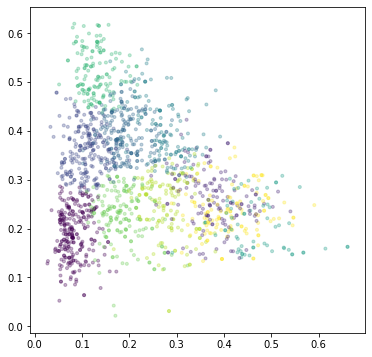

In [26]:

km = KMeans( n_clusters=10 )
y_pred = km.fit_predict(wine_np[:, :11])

plt.figure(figsize=(6,6))
plt.scatter(wine_np[:, 0], wine_np[:, 5], c = y_pred, marker = '.', alpha = 0.3)
plt.show()


# III - Gaussian Mixtures and Expectation Maximization

Motivation: K-means assign a point to a single cluster. Is it possible to relax this constraint?

Soft clustering: represent the probability to belong to a cluster.


## Probability refresher

Normal distribution (1D) : 
\begin{equation}
\mathcal{N}(x | \mu, \sigma^2 ) = \frac{1}{\sqrt{2 \pi \sigma^2}} e^{-\frac{(x-\mu)^2}{2 \sigma^2}}
\end{equation}

<center>
<img src = "imgs/normal.png" width = 300>
</center>

But, Gaussians are unimodal, poor modeling capability.

Mixture models are more expressive!


## Mixture of Gaussians

Let's assume that the data comes from a mixture of gaussians:
- k gaussians in the mixture, of weight $\pi_i$
- each gaussian with its own covariance and mean

$\theta$ collection of all parameters. Multidimensional:

\begin{equation}
p(x|\theta) = \sum_{k=1}^K \pi_k\mathcal{N}(x | \mu_k, \Sigma_k)
\end{equation}


In [27]:
# Example in 2D:
import scipy.stats as ss

n_samples = 10000
k_components = 3
weights = np.ones(k_components) / 3.0

gaussian_params = np.array([[2, 0.5], [4, 2], [10, 1.5]])

mixture_idx = np.random.choice(len(weights), size=n_samples, replace=True, p=weights)

# y is the mixture sample
y = np.fromiter((ss.norm.rvs(*(gaussian_params[i])) for i in mixture_idx),
                   dtype=np.float64)


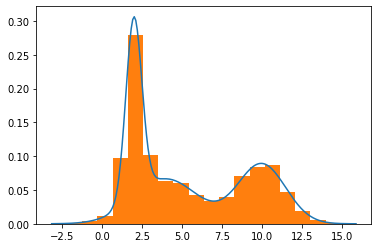

In [28]:
# Theoretical PDF plotting -- generate the x and y plotting positions
xs = np.linspace(y.min(), y.max(), 200)
ys = np.zeros_like(xs)

for (l, s), w in zip(gaussian_params, weights):
    ys += ss.norm.pdf(xs, loc=l, scale=s) * w

plt.plot(xs, ys)
plt.hist(y, density=True, bins=20)

plt.show()


Now, we want to solve the inverse problem: How do we find out the parameters of the gaussians from the data?

<center>
<img src="imgs/em.gif" width = 600>
</center>

Bayes' theorem: $$ P(A \mid B) = \frac{P(B \mid A) \, P(A)}{P(B)} $$

EM derived mathematically, but out of the scope of this Lecture.

Iterative approach: Similar to K-means, but probabilistic view.

Algorithm: Expectation-Maximization:
- Expectation: calculate the probability that a datapoint is generated by a component of the mixture\
- Maximization: Calculate the new values of $\pi_k$, $\mu_k$ and $\Sigma_k$



## Expectation: Evaluate responsibilities

A mixture component has a high responsibility for a datapoint: point is a plausible sample

Responsibility of the $k^{th}$ mixture component:
\begin{equation}
r_{nk} = \frac{\pi_k \mathcal{N}(x_n | \mu_k, \Sigma_k)}{ p( x_n | \theta )}
\end{equation}

$r_n = [ r_{n1}, ..., r_{nK} ] $ normalized probability vector.


## Maximization: 

#### Updating the means

Sort of importance weighted MC estimate of the mean.

The means are pulled strongly towards data points for which the corresponding mixture component has high responsibility:
\begin{equation}
\mu^{new}_k = \frac{\sum_n r_{nk} x_n }{\sum_n r_{nk}}
\end{equation}


#### Updating the covariances

Importance-weighted variance:
\begin{equation}
\Sigma^{new}_k = \frac{\sum_n r_{nk} ( x_n - \mu_k)(x_n - \mu_k)^T }{\sum_n r_{nk}}
\end{equation}



#### Updating the mixture weights

\begin{equation}
\pi_k^{new} = \frac{\sum_n r_{nk}} { N }
\end{equation}

In [29]:
# Non spherical data

from sklearn import mixture
n_samples = 1000

C_1 = np.array([[1., -0.7], [3.5, 1]])
gaussian_1 = np.dot(np.random.randn(int(n_samples/2), 2), C_1)+ np.array([20, 10])

C_2 = np.array([[10., -0.7], [3.5, 5]])
gaussian_2 = np.dot(np.random.randn(int(n_samples/4), 2), C_2)

C_3 = np.array([[5, -2], [3, 10]])
gaussian_3 = np.dot(np.random.randn(int(n_samples/6), 2), C_3)+ np.array([-20, -20])

X_train = np.vstack([gaussian_1, gaussian_2, gaussian_3])
y_true = np.vstack([ np.zeros((int(n_samples/2), 1)), np.ones((int(n_samples/4), 1)), 2*np.ones((int(n_samples/6), 1))])
y_true = y_true.reshape( -1,)


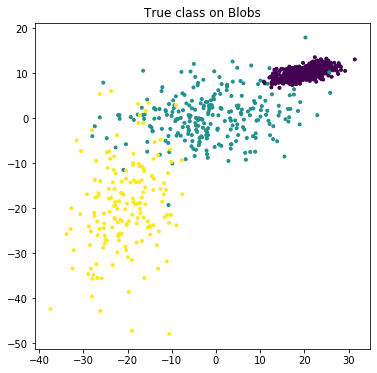

In [30]:
plt.figure(figsize=(6,6))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_true, marker='.')
plt.title("True class on Blobs")
plt.show()

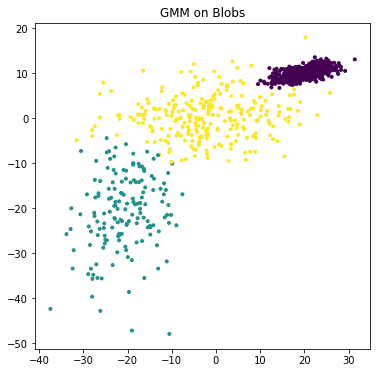

In [31]:
gmm = mixture.GaussianMixture(n_components=3, covariance_type='full')
y_pred = gmm.fit_predict(X_train)

plt.figure(figsize=(6,6))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_pred, marker='.')
plt.title("GMM on Blobs")
plt.show()

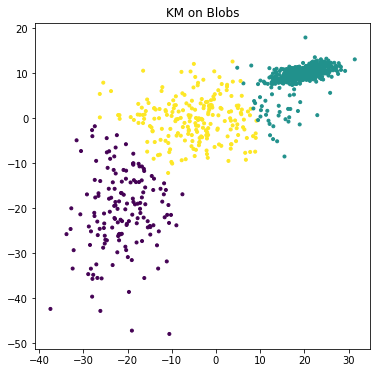

In [32]:
kmeans = KMeans(n_clusters=3)
y_pred = kmeans.fit_predict(X_train)

plt.figure(figsize=(6,6))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_pred, marker='.')
plt.title("KM on Blobs")
plt.show()

How to decide on a number of mixture components?

Bayesian Information Criterion:
- criterion for model selection
- look for lowest BIC

\begin{equation}
BIC = ln(n)k - 2 ln( \hat{L} )
\end{equation}

With n sample size, $\hat{L}$ likelihood of the data given the model, k number of parameters:
- compromise between accuracy and complexity


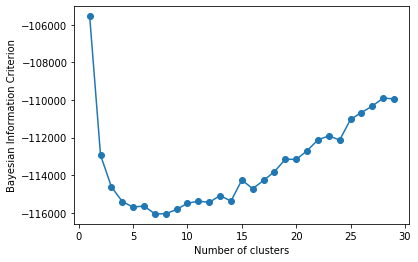

In [33]:
## Example with wine
wine_np = wine_pd.to_numpy()
wine_np = normalize(wine_np)

bics = []
for i in range(1, 30): 
    gmm = mixture.GaussianMixture(n_components=i, covariance_type='full')
    gmm.fit(wine_np[:,:11])
    bics.append(gmm.bic(wine_np[:,:11]))

# plot
plt.plot(range(1, 30), bics, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Bayesian Information Criterion')
plt.show()

# With k-means, around 10 centers

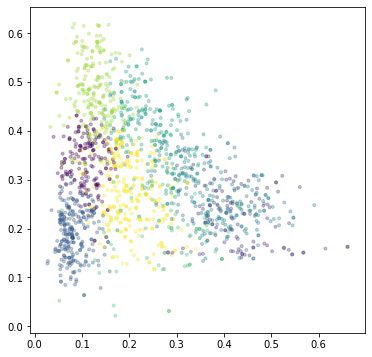

In [49]:
gmm = mixture.GaussianMixture(n_components=8, covariance_type='full')
y_pred = gmm.fit_predict(wine_np[:,:11])

plt.figure(figsize=(6,6))
plt.scatter(wine_np[:, 0], wine_np[:, 5], c = y_pred, marker = '.', alpha = 0.3)
plt.show()

## How is it used?

Once the model is fitted:
- Density estimation
- clustering
- feature extraction



## IV - Spectral clustering

In both k-means and GMM, we look at the Euclidian distance between datapoints and clusters.

Now, if the data has a particular shape, euclidian distance might not be the right way to describe similarity between elements.



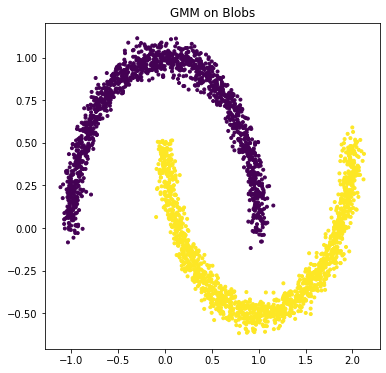

In [54]:
from sklearn.datasets import make_moons

n_samples = 3000
noisy_circles, circle_classes = make_moons(n_samples=n_samples, noise=.05)

plt.figure(figsize=(6,6))
plt.scatter(noisy_circles[:, 0], noisy_circles[:, 1], c=circle_classes, marker='.')
plt.title("GMM on Blobs")
plt.show()


Distance between points can also be expressed in terms of geodesic distances along a graph.

First, build a Similarity graph:
- $\epsilon$- neighborood graph
- k-NN graph
- fully connected graph

Compute the unnormalized Laplacian (see [here](http://people.csail.mit.edu/dsontag/courses/ml14/notes/Luxburg07_tutorial_spectral_clustering.pdf) for a detailed explanation ).

Perform eigen decomposition of L, and cluster the rows of the eigenvector matrix U using K-means.

Output is Spectral Clustering: clusters on spectral data.
From Graph Theory, it works.


c:\users\sbrn692\appdata\local\programs\python\python37\lib\site-packages\sklearn\manifold\spectral_embedding_.py:235: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


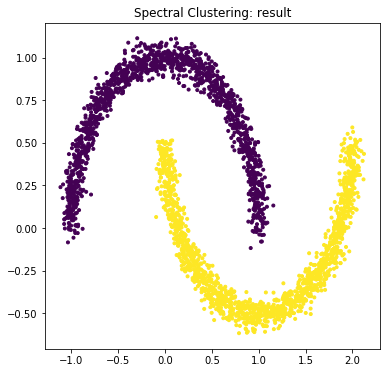

In [55]:
from sklearn.cluster import SpectralClustering, DBSCAN


y_pred = SpectralClustering( n_clusters = 2, affinity = 'nearest_neighbors', n_neighbors = 10).fit_predict(noisy_circles[:,:2])

plt.figure(figsize=(6,6))
plt.scatter(noisy_circles[:, 0], noisy_circles[:, 1], c=y_pred, marker='.')
plt.title("Spectral Clustering: result")
plt.show()



Spectral clustering can be very useful when the data can be represented as a graph.

Also, when the measure of euclidian distance doesn't make sense anymore.

## V - Other Methods

In general, four main families of clustering:
- connectivity models (Hierarchical Clustering)
- centroid models (K-means)
- distribution models (GMM)
- density models

<img src="imgs/cluster_comparison.png" alt="Unsupervised Learning Sketch" style="width: 600px;"/>


## Example: Discovering objects

https://arxiv.org/pdf/1810.01870.pdf


<img src="imgs/sensorimotor.png">



<img src="imgs/sm_transition.png">


## Questions?

## VI - Lab 07